In [1]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show

output_notebook()
sns.set_style("darkgrid")

Loading BokehJS ...

In [2]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = pd.Series(iris.target)
df_iris["readable_target"] = pd.Series(iris.target_names[df_iris['target']])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,readable_target
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Seaborn

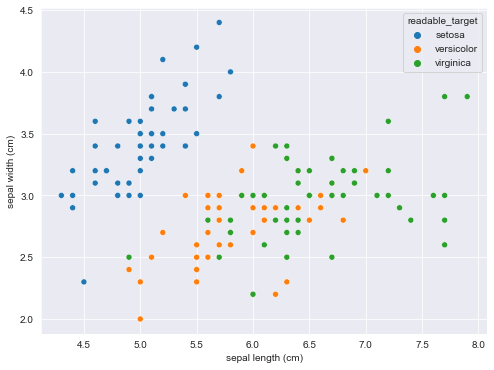

In [3]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_iris, x="sepal length (cm)", y="sepal width (cm)", hue="readable_target");

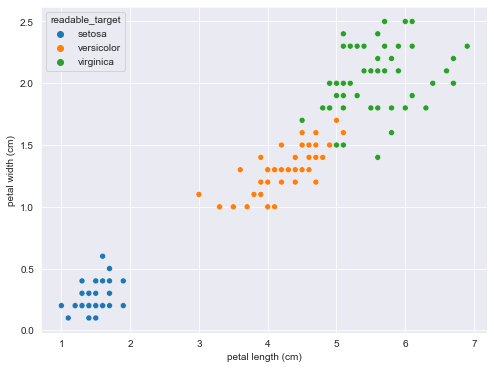

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_iris, x="petal length (cm)", y="petal width (cm)", hue="readable_target");

# Pandas

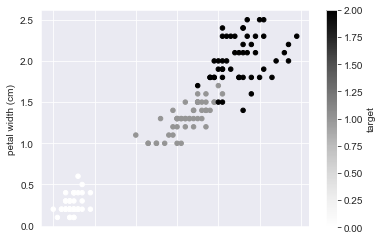

In [5]:
df_iris.plot.scatter(x="petal length (cm)", y="petal width (cm)", c="target");

# Bokeh

In [6]:
colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
df_iris["color"] = [colormap[x] for x in df_iris['readable_target']]

TOOLTIPS = [
    ("petal length", "@{petal length (cm)} cm"),
    ("petal width", "@{petal width (cm)} cm"),
    ("class", "@readable_target"),
]

p = figure(plot_width=600, plot_height=600, tooltips=TOOLTIPS)

p.xaxis.axis_label = 'Petal Length (cm)'
p.yaxis.axis_label = 'Petal Width (cm)'

p.circle(x="petal length (cm)", y="petal width (cm)", color="color", size=10, alpha=0.5, source=df_iris, legend_group="readable_target")

p.legend.location = "bottom_right"

show(p)